In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Gaussian Wave Function

def psi(x,sig):
    return (1/(2*pi*sig**2))**0.25*np.exp(-x**2/(4*sig**2))

def phi(p,sig):
    return (2*sig**2/pi)**0.25*np.exp(-sig**2*p**2)


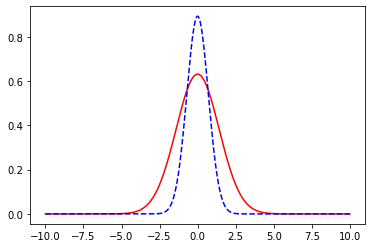

In [3]:
xf = np.linspace(-10,10,1000)
plt.plot(xf, psi(xf,1),"r-")
plt.plot(xf, phi(xf,1),"b--")

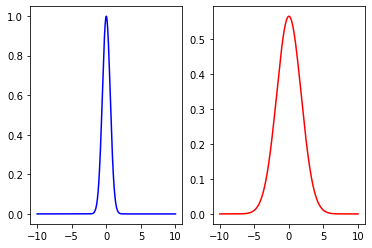

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes = axes.flatten()
axes[0].plot(xf, psi(xf,0.4),"b-")
axes[1].plot(xf, phi(xf,0.4),"r-")

In [5]:
total_frames=200
def sig(i):  
    i = i%total_frames
    half = total_frames / 2
    a = 0.2
    b = 1/(2*a)
    if (i<half):    
        return a + (b-a)*i/half
    else:
        return b + (a-b)*(i-half)/half


<IPython.core.display.Javascript object>


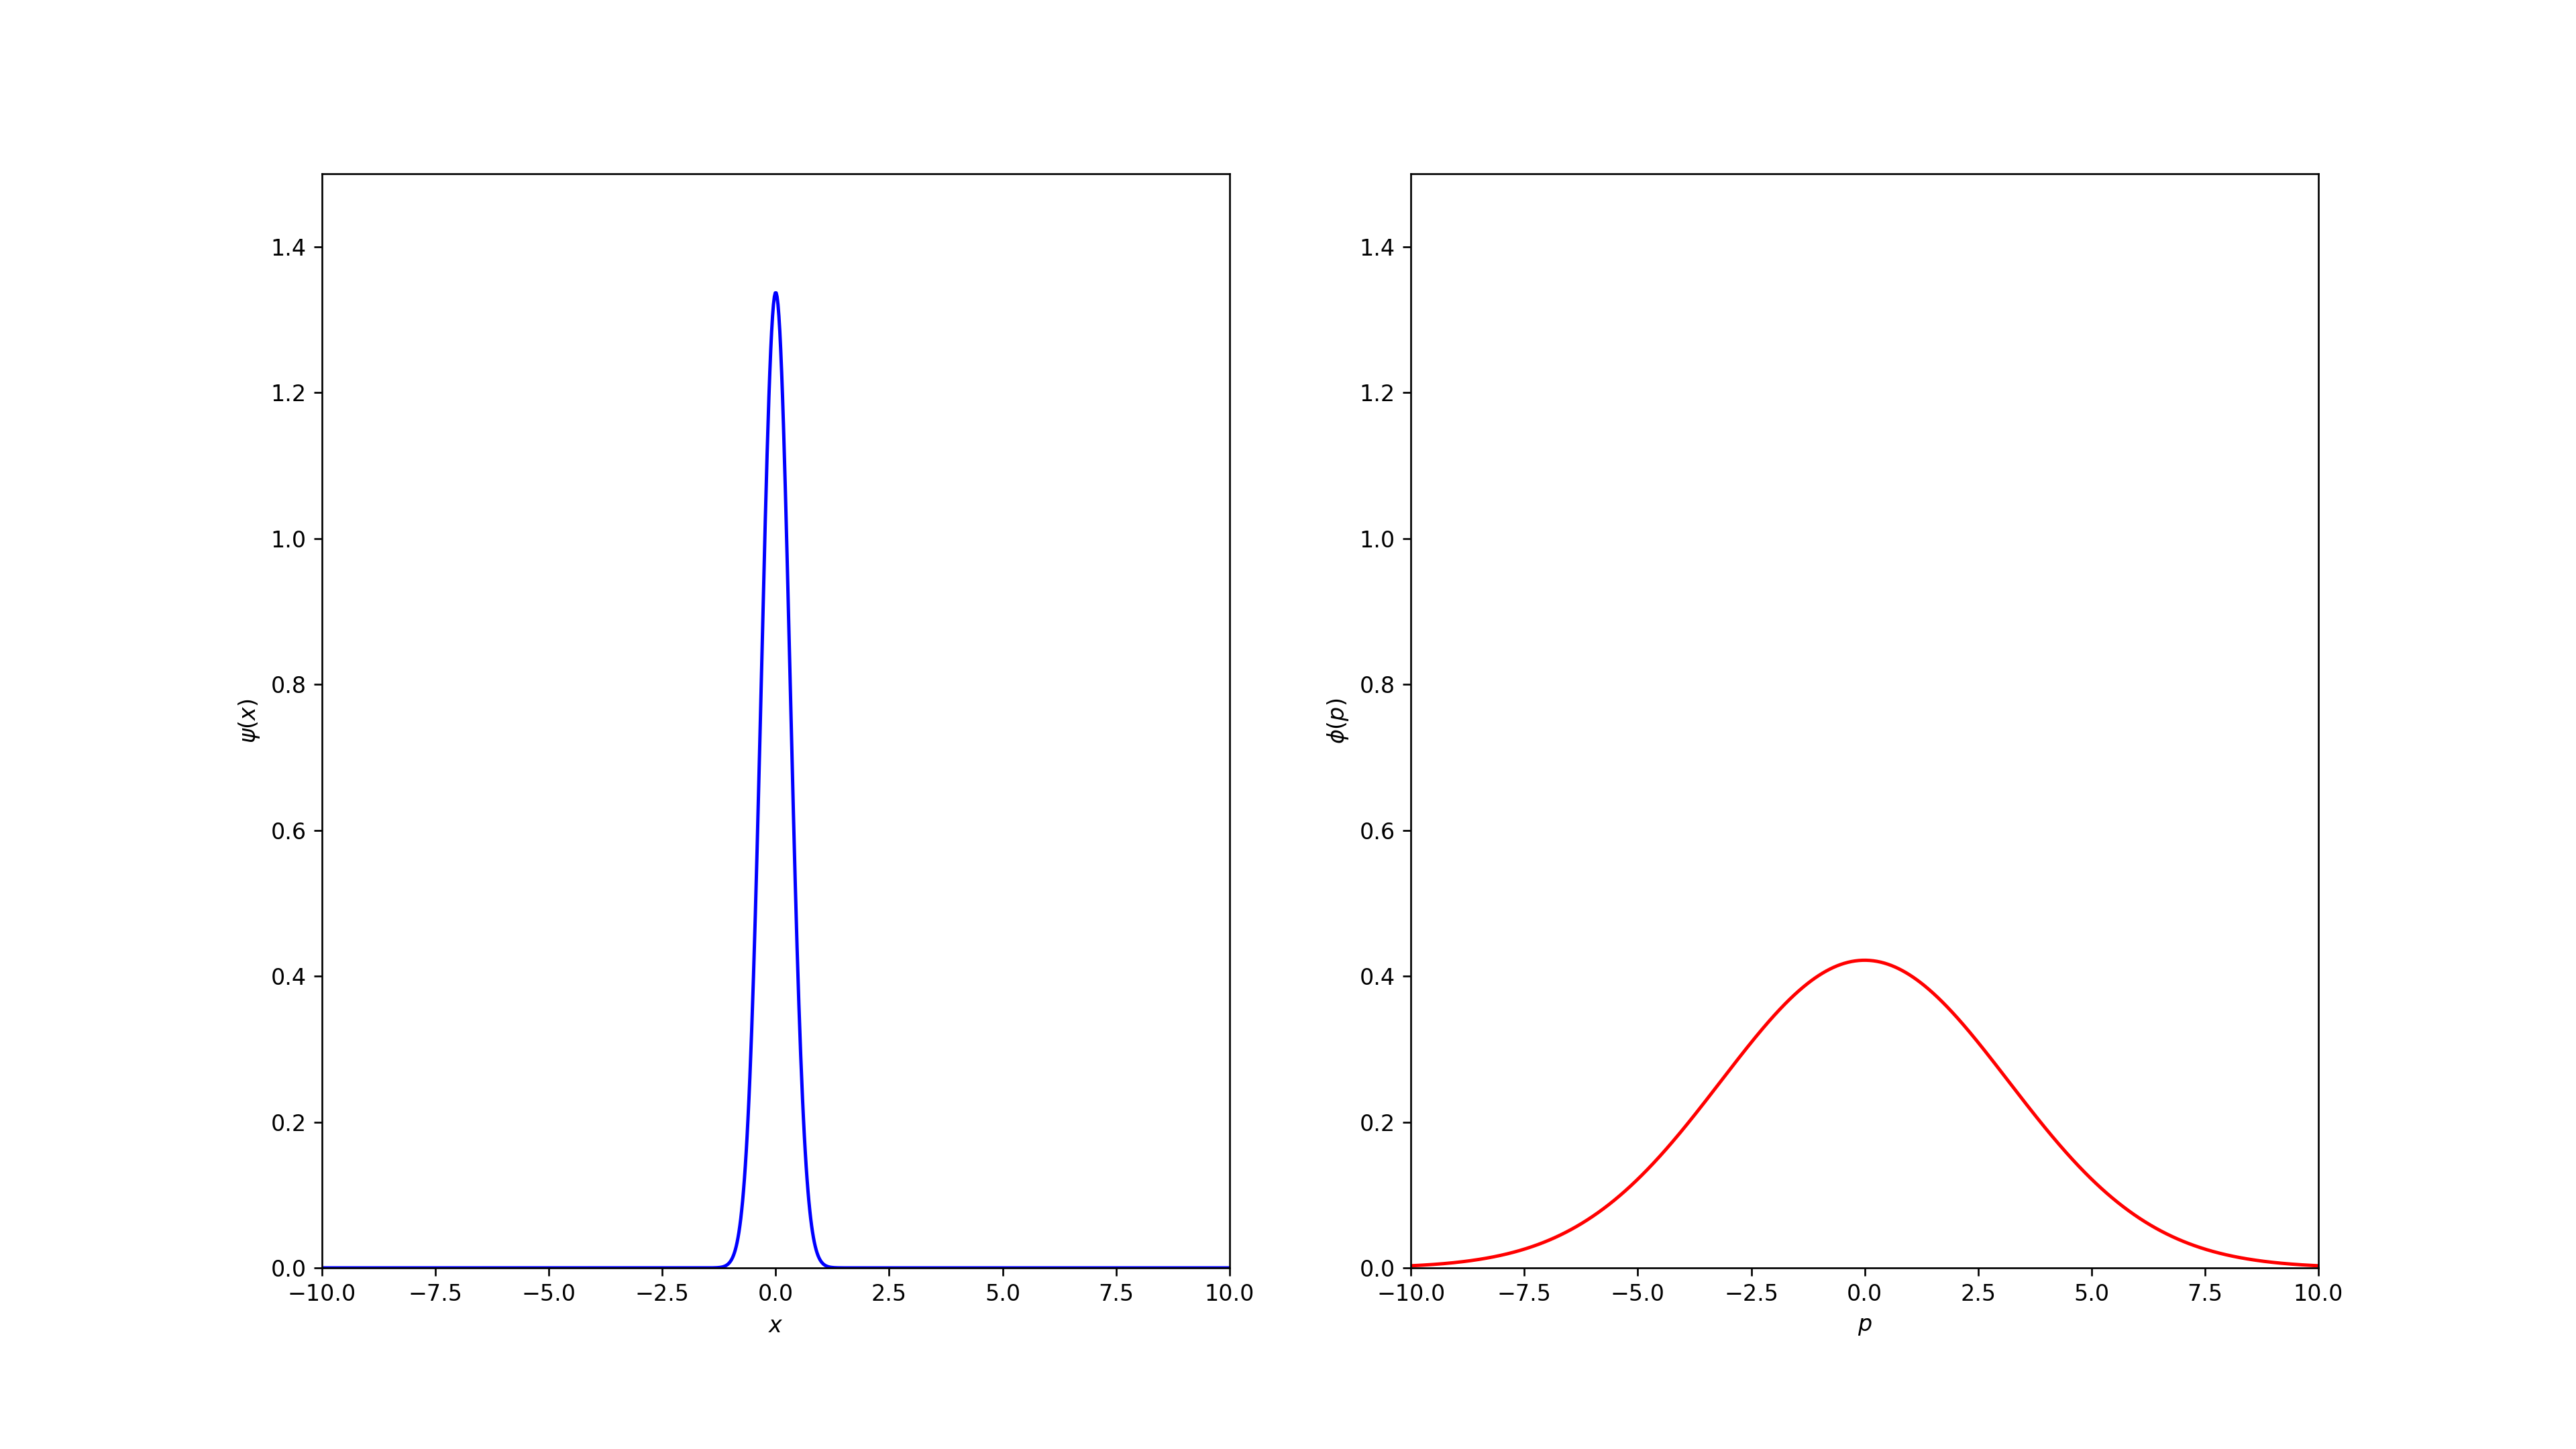

In [7]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers

#WRITE_MP4 = False
WRITE_MP4 = True

file_name = "uncertainty"

# The frames per second is accurate when writing an mp3 file,
# but when just showing the animation the timing can lag.
tstep     = 1
fps       = 20
frame_ms  = 1000/fps
second_tau = fps*tstep

fig, axes = plt.subplots(1,2, figsize=(16, 9), dpi=(1920/16))
#fig, axes = plt.subplots(1,2)

axes = axes.flatten()
xf = np.linspace(-10,10,1000)
la, = axes[0].plot([0], [2],"b-")
lb, = axes[1].plot([0], [2],"r-")
    
axes[0].set_xlim (-10,10)
axes[1].set_xlim (-10,10)
axes[0].set_ylim (0,1.5)
axes[1].set_ylim (0,1.5)
    
axes[0].set_xlabel("$x$")
axes[0].set_ylabel("$\psi(x)$")
axes[1].set_xlabel("$p$")
axes[1].set_ylabel("$\phi(p)$")


#ax .set_title("Traveling Gaussian Wave Packet")    
    
def animate (i):
    la. set_data (xf,psi(xf,sig(i)))
    lb. set_data (xf,phi(xf,sig(i)))
    #plt.legend()
    #ax.legend().set_visible(show_legend)
    
anim = FuncAnimation (plt .gcf () , animate , frames =2*total_frames , interval =20 , repeat = False )
#anim = FuncAnimation (plt .gcf () , animate , frames =100 , interval =frame_ms , repeat = False )
    
# Set up formatting for the movie files
if (WRITE_MP4):
    Writer = writers['ffmpeg']
    writer = Writer(fps=fps, metadata=dict(artist='Mulhearn'), bitrate=3600)
    anim.save(file_name+".mp4", writer=writer)

